![Workout image](gym.png)

You are a product manager for a **fitness studio** based in Singapore and are interested in understanding the types of digital products you should offer. You already run successful local studios and have an established practice in Singapore. You want to understand the place of digital fitness products in your local market.

You would like to conduct a market analysis in Python to understand how to place your digital product in the regional market and what else is currently out there.

A market analysis will allow you to achieve several things. By identifying strengths of your competitors, you can gauge demand and create unique digital products and services. By identifying gaps in the market, you can find areas to offer a unique value proposition to potential users.

The sky is the limit for how you build on this beyond the project! Some areas to go investigate next are in-person classes, local gyms, local fitness classes, personal instructors, and even online personal instructors. 

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', palette='Pastel2')
import os

def read_file(filepath, plot = True):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with three columns: 'week', 'region', and 'interest'. Generate a line plot using Seaborn to visualize the data. This corresponds to the first graphic (time series) returned by trends.google.com. 
    """
    file = pd.read_csv(filepath, header=1)
    df = file.set_index('Week').stack().reset_index()
    df.columns = ['week','region','interest']
    df['week'] = pd.to_datetime(df['week'])
    plt.figure(figsize=(8,3))
    df = df[df['interest']!="<1"]
    df['interest'] = df['interest'].astype(float)

    if plot:
        sns.lineplot(data = df, x= 'week', y= 'interest',hue='region')
    return df

def read_geo(filepath, multi=False):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with two columns: 'country' and 'interest'. Generate a bar plot using Seaborn to visualize the data. This corresponds to the second graphic returned by trends.google.com. Use multi=False if only one keyword is being analyzed, and multi=True if more than one keyword is being analyzed.
    """
    file = pd.read_csv(filepath, header=1)

    if not multi:
        file.columns = ['country', 'interest']
        plt.figure(figsize=(8,4))
        sns.barplot(data = file.dropna().iloc[:25,:], y = 'country', x='interest')

    if multi:
        plt.figure(figsize=(3,8))
        file = file.set_index('Country').stack().reset_index()
        file.columns = ['country','category','interest']
        file['interest'] = pd.to_numeric(file['interest'].apply(lambda x: x[:-1]))
        sns.barplot(data=file.dropna(), y = 'country', x='interest', hue='category')

    file = file.sort_values(ascending=False,by='interest')
    return file

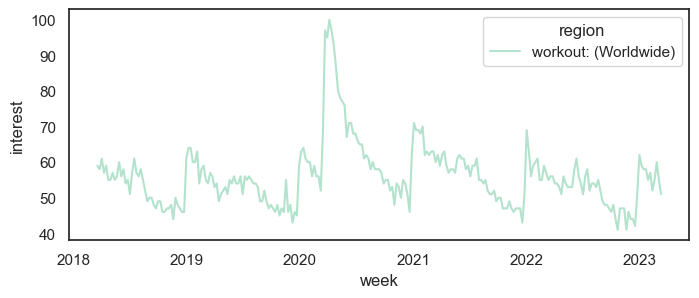

In [6]:
# Load data on global interest in fitness
workout = read_file('data/workout.csv', plot=True)

In [7]:
# Find average interest by month 
workout_by_month = workout.set_index('week').resample('M').mean()

# Display the resutls
workout_by_month.head()

,interest
week,
2018-03-31,58.50
2018-04-30,57.40
2018-05-31,57.00
2018-06-30,55.75
2018-07-31,56.40
